In [3]:
!pip3 install -r requirements.txt

In [4]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY_batch8_11Nov_AIplusOpenAI/refs/heads/main/data.csv')

In [5]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
# Correlation -> how are variables (COLUMNS OR DIMENSIONS) related to each other?

# if there is a very strong correlation between multiple columns, then they are essentially giving us same information!
# Do we really need all of them or any one of those columns could have done the trick?
all_cols = list(data.columns) [:12] # selecting just the mean columns
all_cols.remove('diagnosis')
cors = data.loc[:, all_cols].corr() 
print(cors)

                              id  radius_mean  texture_mean  perimeter_mean  \
id                      1.000000     0.074626      0.099770        0.073159   
radius_mean             0.074626     1.000000      0.323782        0.997855   
texture_mean            0.099770     0.323782      1.000000        0.329533   
perimeter_mean          0.073159     0.997855      0.329533        1.000000   
area_mean               0.096893     0.987357      0.321086        0.986507   
smoothness_mean        -0.012968     0.170581     -0.023389        0.207278   
compactness_mean        0.000096     0.506124      0.236702        0.556936   
concavity_mean          0.050080     0.676764      0.302418        0.716136   
concave points_mean     0.044158     0.822529      0.293464        0.850977   
symmetry_mean          -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean -0.052511    -0.311631     -0.076437       -0.261477   

                        area_mean  smoothness_mean 

<Axes: >

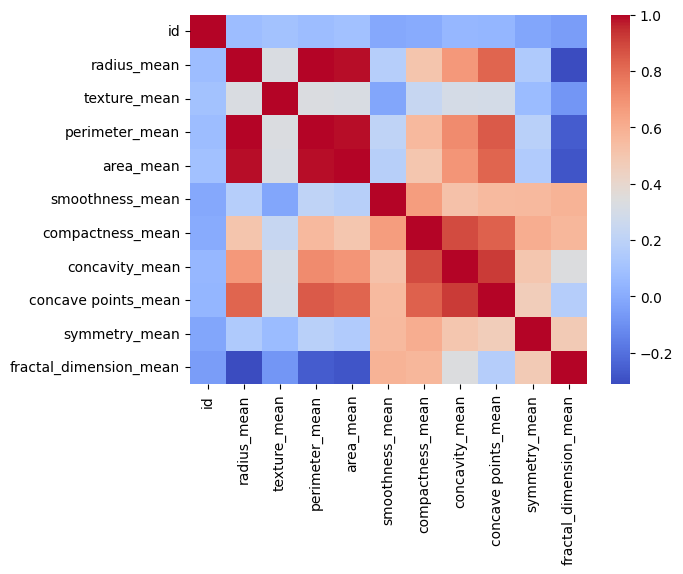

In [16]:
import seaborn as sns
sns.heatmap(cors, cmap='coolwarm')

# Our learning-> because radius, area and perimeter are highly corrrelated
# -> tending to exactly 1 correlation-> we don't need all 3 of them
# but rather just 1 of them!
# all 3 of them are functions of 1 variable called radius!!!


# Learning no. 2:
# ID column-> we see that ID column is NOT correlated with 
# absolutely anything else! It seems to be a totally USELESS 
# dimension! Do we remove it? Or do we conduct more tests to 
# validate that its indeed useless!!


# Useful v/s useless columns:
# if a variable (dimension or column) is impacting either INPUTS
# or OUTPUT then it is useful, otherwise useless!

<Figure size 640x480 with 0 Axes>

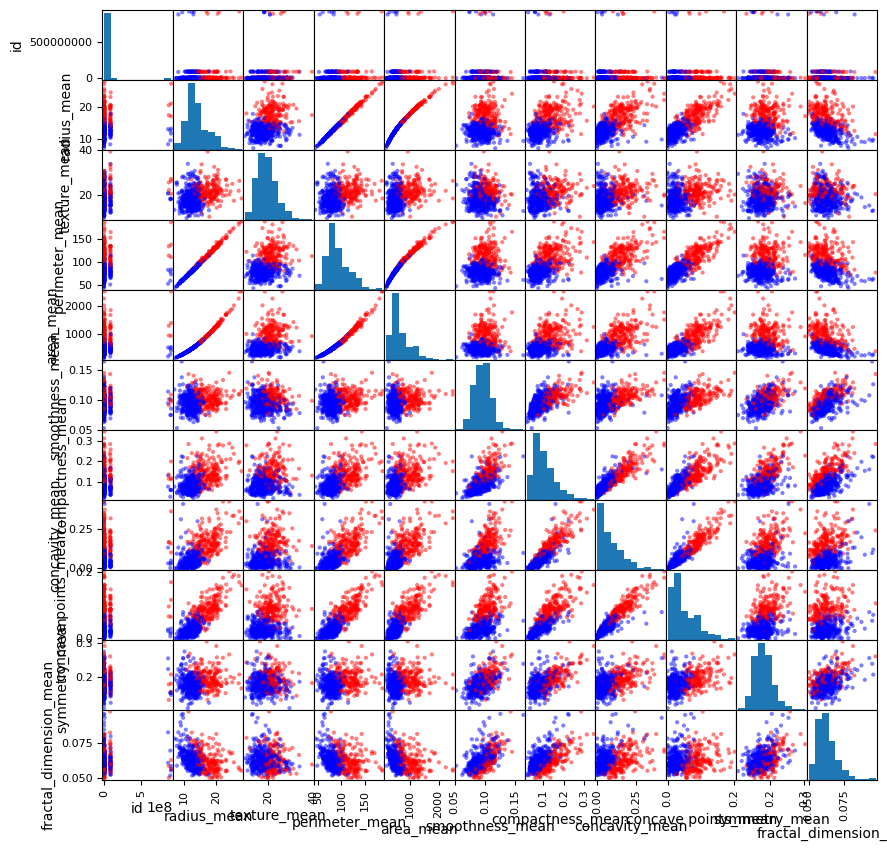

In [18]:
import matplotlib.pyplot as plt
diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis

inps = data.loc[:, all_cols]
plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inps, c=diagnosis_encoded, figsize=(10,10))
plt.show()

<Figure size 640x480 with 0 Axes>

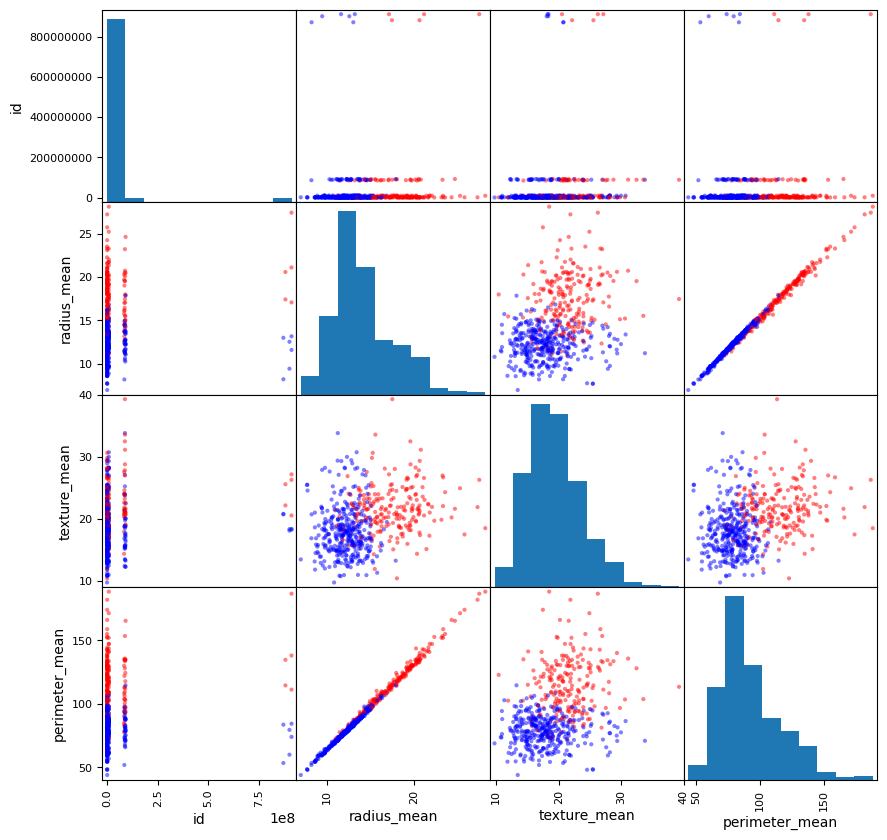

In [20]:
# taking a smaller sample for better visuals

inps = data.loc[:, all_cols[:4]]
plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inps, c=diagnosis_encoded, figsize=(10,10))
plt.show()

# ID -> special interest -> red and blue are all over the place
# and their trajectory is completely parallel to both X-axis
# and y-axis! This means-> that change output or other inputs
# by any tiny value (dx), our column is NOT GOING TO HAVE ANY 
# IMPACT WHATSOEVER!

In [21]:
# check if ID column has all unique values

data['id'].value_counts().count() 
# value_counts gives you unique/distinct values in a column

np.int64(569)

In [22]:
len(data)
# len of data is same as distinct values in ID, and hence
# ID can be used as 'primary key' or an INDEX of its own!!!

569

In [23]:
data.index
# our current index has no special purpose and is just a counter!

RangeIndex(start=0, stop=569, step=1)

In [26]:
data = data.set_index('id')
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [32]:
all_cols.remove('id')

In [48]:
all_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

/tmp/ipykernel_3482/1223692451.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
/tmp/ipykernel_3482/1223692451.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color

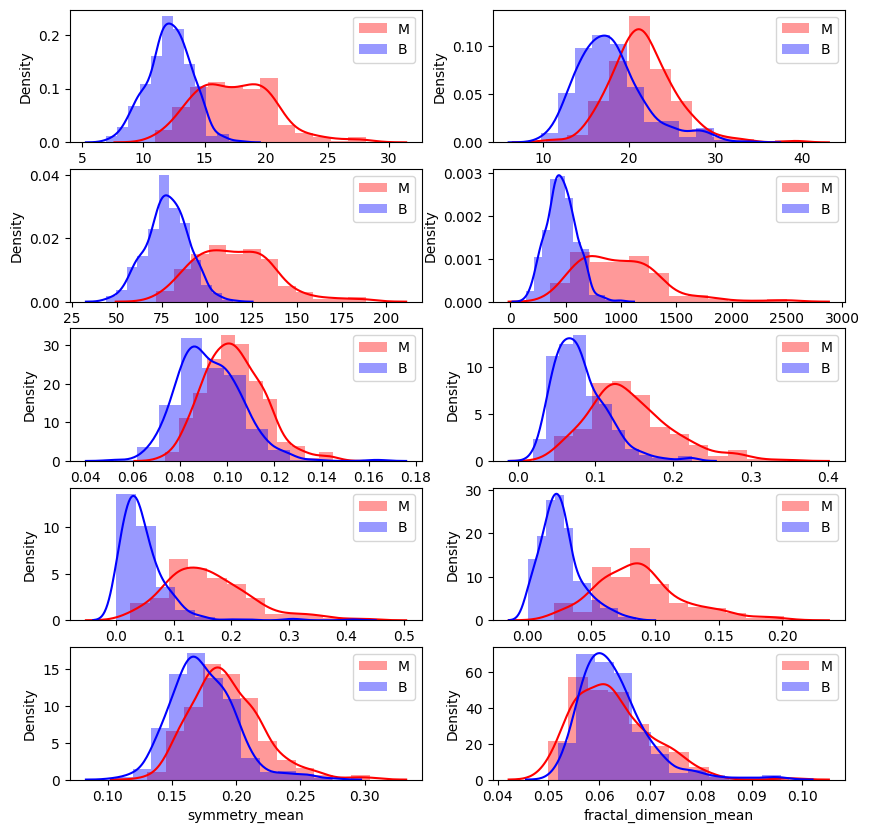

In [34]:
inps = data.loc[:, all_cols[:10]]
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inps.columns):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()


In [35]:
# for sake of simplicity, we will continue
# with first 10 variables

In [36]:
# prediction?

# Statistics, Probability, 

# 20, 21, 22, 23, ? ??? -> 24.25.....-> stats can't be applied everywhere!

# probability can be easily calculated between dies, dependencies

# what if using statistics we could figure out a geometric pattern
# in our data? and then using probability, convert into a 
# 'probabilistic outcome' -> ML

In [39]:
# ML => y = mx + c

# outcome = weights * inputs + bias 

# diagnosis = w1*radius_mean + w2*texture_mean + w3*area_mean....
#         w10*fractal_dim_mean + bias

# 2a+b=1, a-b=-1, a=?,b=? -> simultaneous equations 

# we already know diagnosis, we already know the values of radius, texture...

# what is MACHINE trying to LEARN?

In [40]:
# we already know X and Y, so machine is trying to learn the values
# of M and C such that equation makes sense and delivers least errors!

In [42]:
# diagnosis = w1*radius_mean + w2*texture_mean + w3*area_mean....
#         w10*fractal_dim_mean + bias

# diagnosis is known, and so are features
# so ml is finding [w1,w2...w10], [bias] 

# We have now is an ALGORITHM
# as we try to fit it into data, we will create a "MODEL"
# algorithm is logic, model is actual numbers and values!

In [43]:
# y = 4ax2 + c is an equation or ALGO
# diagnosis = 4.44 * radius^2 + 2 is a MODEL

In [44]:
# Linear Regression 

# Regression-> continuous numbers
# classification-> binary-> this line can also be used to classify
# areas above the line, and below the line!

In [58]:
x = data.loc[:, all_cols]
y = data.loc[:, 'diagnosis']
#print(type(y))
#print(y[:5])
logic = {'M':1, 'B':0}
lambda_logic = lambda val: logic[val]
y = y.map(lambda_logic)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [59]:
print(ytrain.tail()) # verify its all 1 and 0, and no longer M and B

id
897630      1
87930       0
9110127     1
90602302    1
866714      0
Name: diagnosis, dtype: int64


In [62]:
xtrain.tail() # validate that IDs of xtrain and ytrain are still corresponding
# even after shuffling and distributing the data!

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
897630,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083
87930,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373
9110127,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780
90602302,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,0.06864
866714,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # starts with a WRONG equation

# Training data is used to teach the model how to FIT into data

# testing data (scoring data) is used to figure out how good or bad our equation is!
model.fit(xtrain, ytrain)

/home/shantanu/Lab08/pikachu/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predictions = model.predict(xtest)
# ONLY TESTING DATA PROVIDED
# Model will now provide us predictions
# which we can verify against ytest outcomes that we already know!

In [65]:
predictions[:5]

array([0, 1, 1, 0, 0])

In [66]:
ytest[:5]

id
89382602    0
865423      1
8610637     1
903011      0
899187      0
Name: diagnosis, dtype: int64